In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# The hdf5 data file

This notebook provides examples for accessing data within an oskar hdf5 datafile.

In [3]:
from e11 import run_file, H5Data, add_column_index

`run_file()`  
    - A function that generates the path to the data file using the run ID and base directory.

`H5Data`  
    - A class that provides a convienient interface for an oskar hdf5 data file.

Normally, the datafiles files would be saved in a timestamp structure and each can be found using the `rid`.  The path to the file can then be built using `run_file`.

``` python
>>> fil = run_file(base="Q:\E11_atmos\data", rid='20171127_155753')
```

But for this example we'll use the example data.

In [4]:
import os 
fil = os.path.join(os.getcwd(), 'example_data', 'laser_data.h5')
# read hdf5 file
h5 = H5Data(fil)
h5.pprint()

100%|██████████| 64/64 [00:00<00:00, 509.13it/s]

file: 		 /home/adam/Git/e11_analysis/notebooks/example_data/laser_data.h5 
size: 		 2.22 MB 
groups: 	 64 
author: 	 AD 
description: 	 Linear up-down scan of DL pro 711 nm


Here, `h5` is an instance of the H5Data class.  Creating this instance generates a `pandas.DataFrame` summary of the group attributes called `h5.log`. 

It's a good idea to specify an `out_dire` when creating the instance,

``` python
>>> h5 = H5Data(fil, out_dire='analysis')
```

If `out_dire` is declared then the log with be cached there as a pickle file.  By default, when loading an instance H5Data checks to see if this file already exists.  The cache allows you to avoid having to rebuild the log in future, which can take a long time for large files accessed over a slow network.

Another use of `out_dire` is for quickly building useful paths, e.g., for saving plots to a sub directory.

``` python
>>> out_fil = h5.sub_dire('plots', fname='signal.png')
>>> plt.savefig(out_fil, bbox_inches='tight', dpi=200)
```

In [5]:
# In our case building the log doesn't take very long.
%time h5.update()

100%|██████████| 64/64 [00:00<00:00, 494.06it/s]


CPU times: user 176 ms, sys: 12 ms, total: 188 ms
Wall time: 185 ms


In [6]:
# log output
h5.log.head()

,ACQUIRE,DATETIME,END,ERROR,LOOP,OVERRIDE,REC:WLM?1,REC:WLM?2,START,VAR:WL?1,ELAPSED
squid,,,,,,,,,,,
1,10.017976,2017-12-01 16:31:44,3.594991e+09,0,1,0,632.991062,711.460801,3.594991e+09,711.4608,00:00:00
2,10.012825,2017-12-01 16:31:57,3.594991e+09,0,1,0,632.991062,711.460900,3.594991e+09,711.4609,00:00:13
3,10.015001,2017-12-01 16:32:10,3.594991e+09,0,1,0,632.991062,711.461001,3.594991e+09,711.4610,00:00:26
4,10.012057,2017-12-01 16:32:23,3.594991e+09,0,1,0,632.991062,711.461101,3.594991e+09,711.4611,00:00:39
5,10.021376,2017-12-01 16:32:37,3.594991e+09,0,1,0,632.991062,711.461201,3.594991e+09,711.4612,00:00:53


Experimental settings are stored in the log file as VARS and measurements as RECS.

In [7]:
# combine VAR and REC data
df = add_column_index(h5.var, 'VAR').join(add_column_index(h5.rec, 'REC'))
df.head()

VAR         REC            
           WL?1       WLM?1       WLM?2
squid                                  
1      711.4608  632.991062  711.460801
2      711.4609  632.991062  711.460900
3      711.4610  632.991062  711.461001
4      711.4611  632.991062  711.461101
5      711.4612  632.991062  711.461201

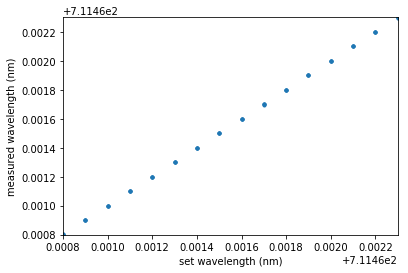

In [8]:
# plot
fig, ax = plt.subplots()

# data
xvals = df[('VAR', 'WL?1')]    # laser wavelength PID reference
yvals = df[('REC', 'WLM?2')]   # measured wavelength
ax.scatter(xvals, yvals, marker='.')

# format
ax.set_xlim([xvals.min(), xvals.max()])
ax.set_ylim([yvals.min(), yvals.max()])
ax.set_xlabel('set wavelength (nm)')
ax.set_ylabel('measured wavelength (nm)')

# output
plt.show()

# Datasets

The hdf5 datafile exists to store datasets.  In our case, these are distributed within groups. Each group represents one configuration of experimental variables (VARS), and they are numbered sequentually by the `squid`.

See 'Raw datasets.ipynb' for accessing different types of hdf5 dataset.

In [9]:
# list the datasets in a particular group
squid = 1
print(h5.datasets(squid))

('WLM',)
